In [29]:
# importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


# set NumPy options
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)

# read CSV data with Pandas
data = pd.read_csv("../data/wine.csv")

# setup data column
data.columns = ["V" + str(i) for i in range(1, len(data.columns) + 1)]
# independent variables data
X = data.loc[:, "V2":]
# dependent variable data
y = data.V1

In [30]:
print("## Data:")
print(data)

print("## Head:")
print(data.head())

print("## Tail:")
print(data.tail())

print("## Info:")
data.info()

## Data:
     V1     V2    V3    V4    V5   V6    V7    V8    V9   V10    V11   V12  \
0     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4     1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

      V13   V14  
0    3.40  1050  
1    3.17  1185  


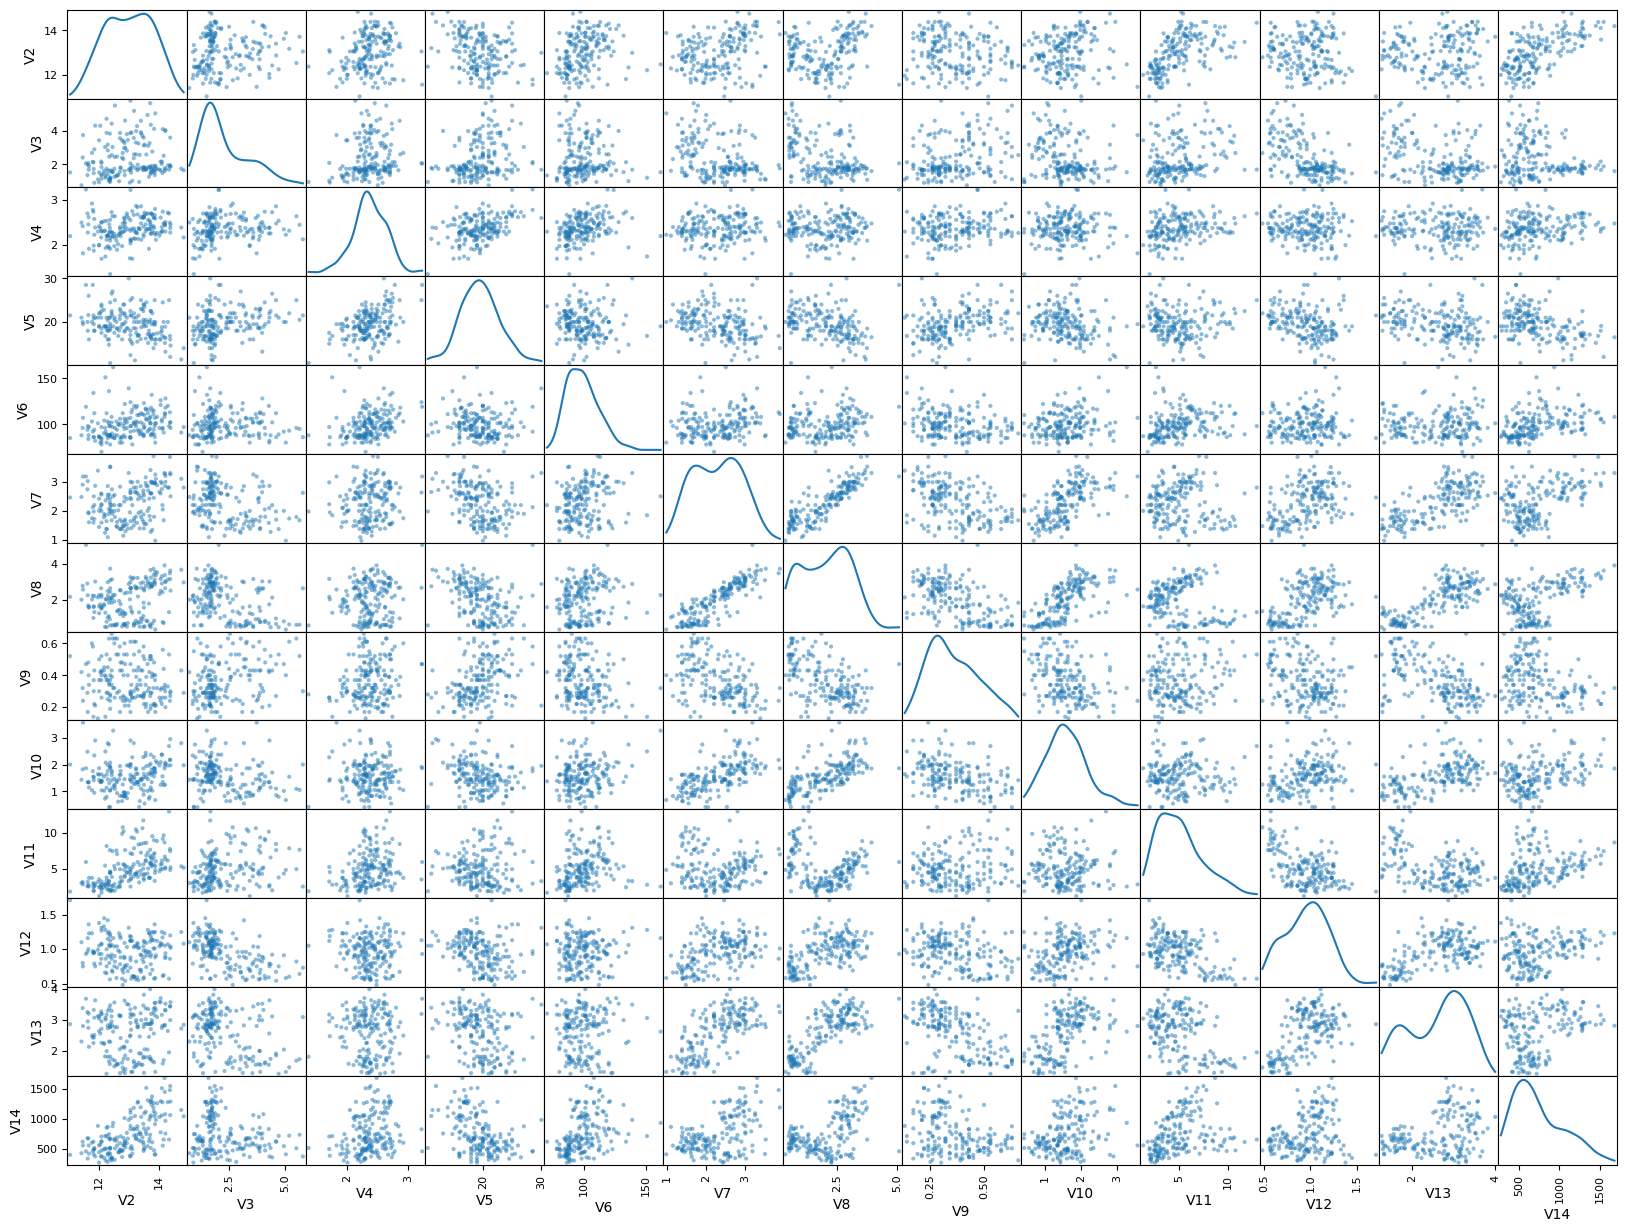

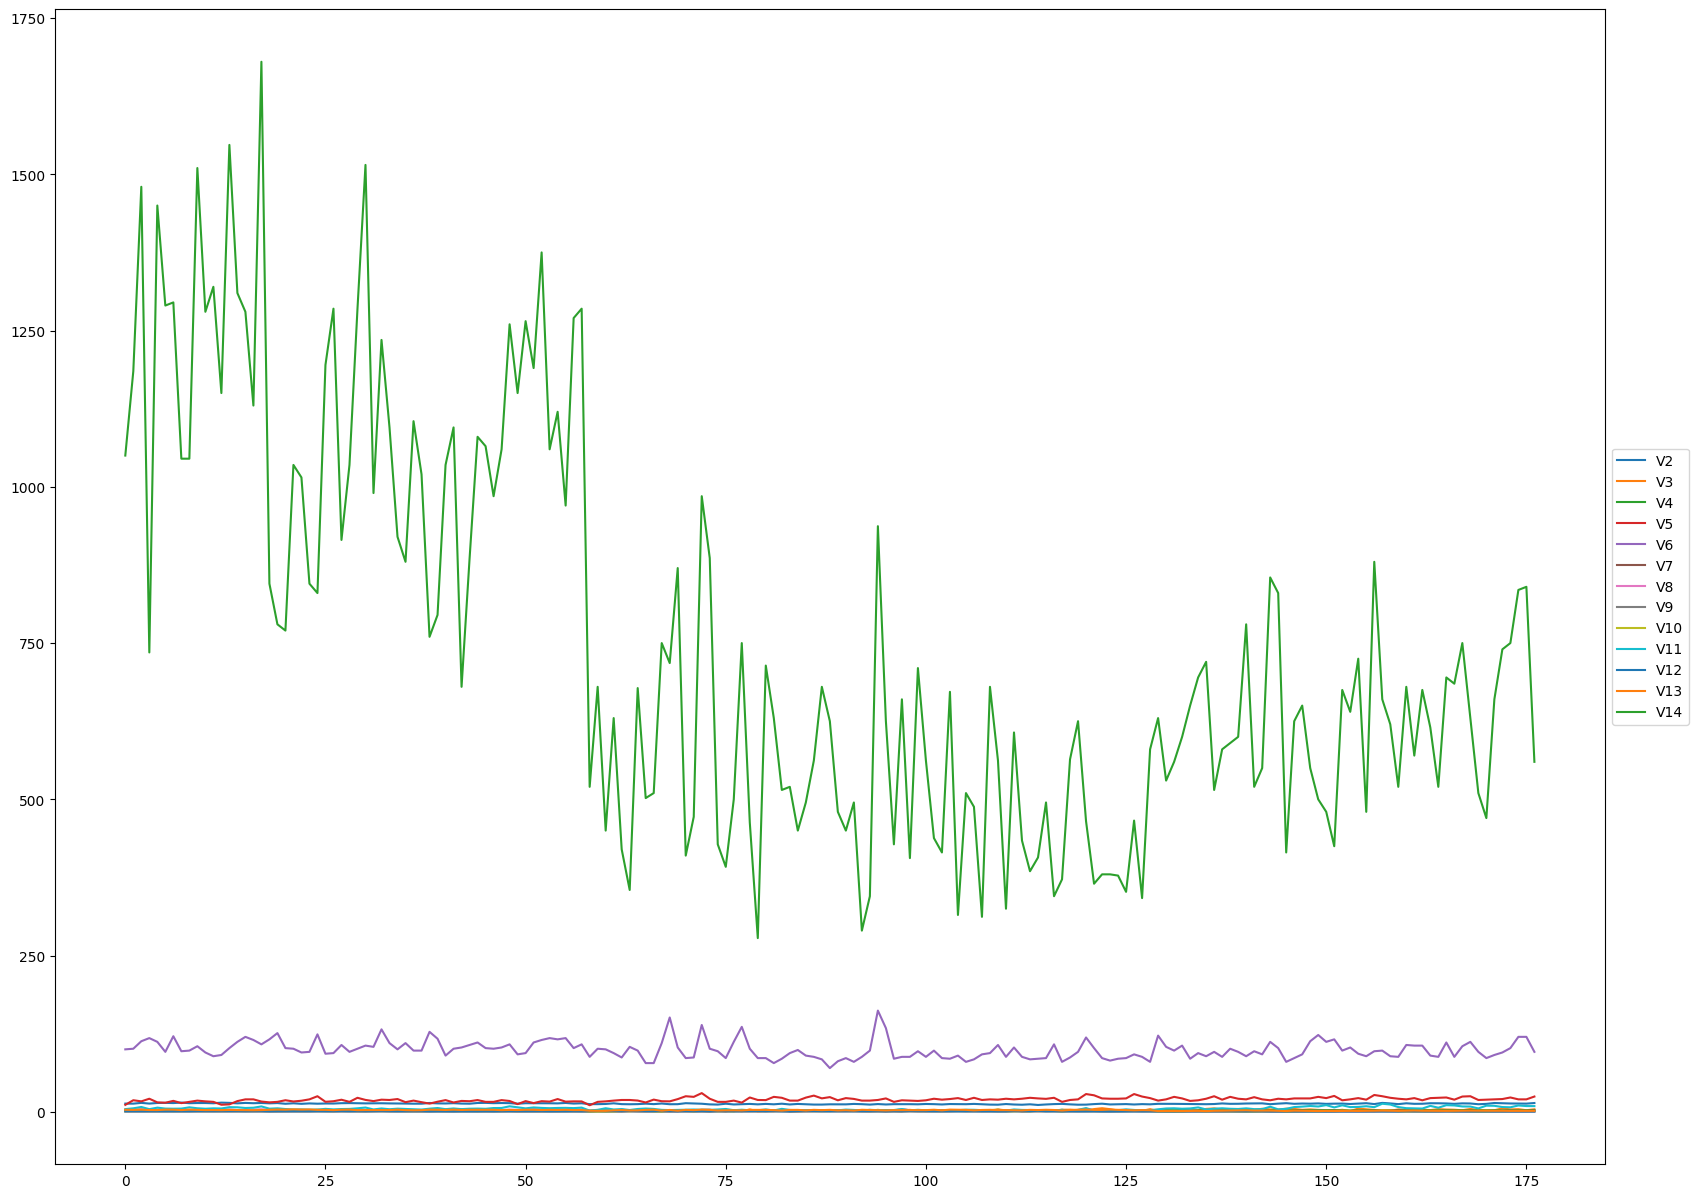

In [31]:
# plotting multivariate data
pd.plotting.scatter_matrix(data.loc[:, "V2":"V14"], diagonal="kde", figsize=(20, 15))
plt.show()

ax = data[["V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14"]].plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [32]:
# calculating summary statistics for multivariate data

# Calculating mean, standard deviation, maximum, and minimum values for each column
mean_values = X.apply(np.mean)
std_values = X.apply(np.std)
max_values = X.apply(np.max)
min_values = X.apply(np.min)

# Creating a DataFrame to represent the statistics as columns
statistics_df = pd.DataFrame({
    "Mean": mean_values,
    "Standard Deviation": std_values,
    "Maximum": max_values,
    "Minimum": min_values
})

print(statistics_df)


           Mean  Standard Deviation  Maximum  Minimum
V2    12.993672            0.806520    14.83    11.03
V3     2.339887            1.116148     5.80     0.74
V4     2.366158            0.274302     3.23     1.36
V5    19.516949            3.326634    30.00    10.60
V6    99.587571           14.133922   162.00    70.00
V7     2.292260            0.624693     3.88     0.98
V8     2.023446            0.995833     5.08     0.34
V9     0.362316            0.124300     0.66     0.13
V10    1.586949            0.569928     3.58     0.41
V11    5.054802            2.317871    13.00     1.28
V12    0.956983            0.228487     1.71     0.48
V13    2.604294            0.703108     4.00     1.27
V14  745.096045          313.993283  1680.00   278.00


In [33]:
# means and variances per group
def print_mean_and_sd_by_group(variables, group_variable):
    data_group_by = variables.groupby(group_variable)

    print("## Means:")
    print(data_group_by.apply(np.mean))

    print("\n## Standard deviations:")
    print(data_group_by.apply(np.std))


print_mean_and_sd_by_group(X, y)

## Means:
V1
1    98.121340
2    51.077883
3    60.259487
dtype: float64

## Standard deviations:
          V2        V3        V4        V5         V6        V7        V8  \
V1                                                                          
1   0.457635  0.687396  0.227141  2.539198  10.136128  0.338920  0.397361   
2   0.534162  1.008391  0.313238  3.326097  16.635097  0.541507  0.700713   
3   0.524689  1.076514  0.182756  2.234515  10.776433  0.353233  0.290431   

          V9       V10       V11       V12       V13         V14  
V1                                                                
1   0.070037  0.408849  1.238484  0.116446  0.342512  221.418938  
2   0.123085  0.597813  0.918393  0.201503  0.493064  156.100173  
3   0.122840  0.404555  2.286743  0.113243  0.269262  113.891805  


C:\Users\kimcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [34]:
# calculating correlations for multivariate data
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

corr_mat = X.corr()
print(corr_mat)

p-value:	 0.18556400432462777
cor:		 0.09996297573855276
           V2        V3        V4        V5        V6        V7        V8  \
V2   1.000000  0.099963  0.210964 -0.303350  0.258742  0.284543  0.230133   
V3   0.099963  1.000000  0.164955  0.286148 -0.049049 -0.333512 -0.409324   
V4   0.210964  0.164955  1.000000  0.446698  0.287107  0.128176  0.114084   
V5  -0.303350  0.286148  0.446698  1.000000 -0.071707 -0.317583 -0.346922   
V6   0.258742 -0.049049  0.287107 -0.071707  1.000000  0.208200  0.187101   
V7   0.284543 -0.333512  0.128176 -0.317583  0.208200  1.000000  0.864046   
V8   0.230133 -0.409324  0.114084 -0.346922  0.187101  0.864046  1.000000   
V9  -0.151445  0.291501  0.187354  0.359395 -0.252091 -0.448301 -0.536326   
V10  0.127561 -0.217975  0.008082 -0.190779  0.226504  0.610533  0.650254   
V11  0.547883  0.250053  0.258643  0.020478  0.199337 -0.056401 -0.174411   
V12 -0.075375 -0.560854 -0.075181 -0.272719  0.052042  0.432987  0.543208   
V13  0.057417 -0.36

In [35]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        print(summary)
    return summary


summary = pca_summary(pca, standardisedX)
print(summary.sdev)
print(np.sum(summary.sdev**2))

Importance of components:
                   sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1            2.162822               0.359831              0.359831
PC2            1.581571               0.192413              0.552244
PC3            1.205541               0.111795              0.664038
PC4            0.961480               0.071111              0.735149
PC5            0.928298               0.066287              0.801437
PC6            0.803024               0.049604              0.851040
PC7            0.742955               0.042460              0.893500
PC8            0.592232               0.026980              0.920480
PC9            0.537755               0.022245              0.942725
PC10           0.496798               0.018985              0.961710
PC11           0.474805               0.017342              0.979052
PC12           0.410337               0.012952              0.992004
PC13    

C:\Users\kimcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [36]:
# Standardizing variables
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

# Calculating mean and standard deviation for each column in standardisedX DataFrame
mean_values = standardisedX.apply(np.mean)
std_values = standardisedX.apply(np.std)

# Printing mean and standard deviation in rows
print("Mean:")
print(mean_values.to_frame().T)

print("Standard Deviation:")
print(std_values.to_frame().T)

# Principal Component Analysis
pca = PCA().fit(standardisedX)

Mean:
             V2            V3            V4            V5            V6  \
0 -5.218675e-16  2.810056e-16 -3.813647e-16 -2.408619e-16 -8.028731e-17   

             V7            V8            V9           V10           V11  \
0 -2.810056e-16  1.605746e-16 -6.021549e-16 -4.014366e-17  1.806465e-16   

            V12           V13           V14  
0  6.021549e-16  7.225858e-16  1.605746e-16  
Standard Deviation:
    V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
